In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Linear Regression with Statsmodels and Scikit-Learn
Week 3 | Day 1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe the assumptions of a linear regression
- Evaluate the "goodness of fit" of your regression
- Perform a linear regression in statsmodels, scikit-learn

## Let's generate some data

In [2]:
# create an x and a y that is 
# 50 plus 2 times x with some random noise around that
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x  + np.random.normal(0, 20, size=len(x))

In [3]:
df = pd.DataFrame(zip(x,y), columns=('X', 'Y'))
df

,X,Y
0,-5.000000,38.237891
1,-4.444444,32.408211
2,-3.888889,27.678906
3,-3.333333,54.883305
4,-2.777778,39.740396
5,-2.222222,86.167615
6,-1.666667,58.831325
7,-1.111111,49.002984
8,-0.555556,29.508284
9,0.000000,42.786868


## Check the correlation

In [4]:
df.corr()

,X,Y
X,1.000000,0.866707
Y,0.866707,1.000000


## Plot the data

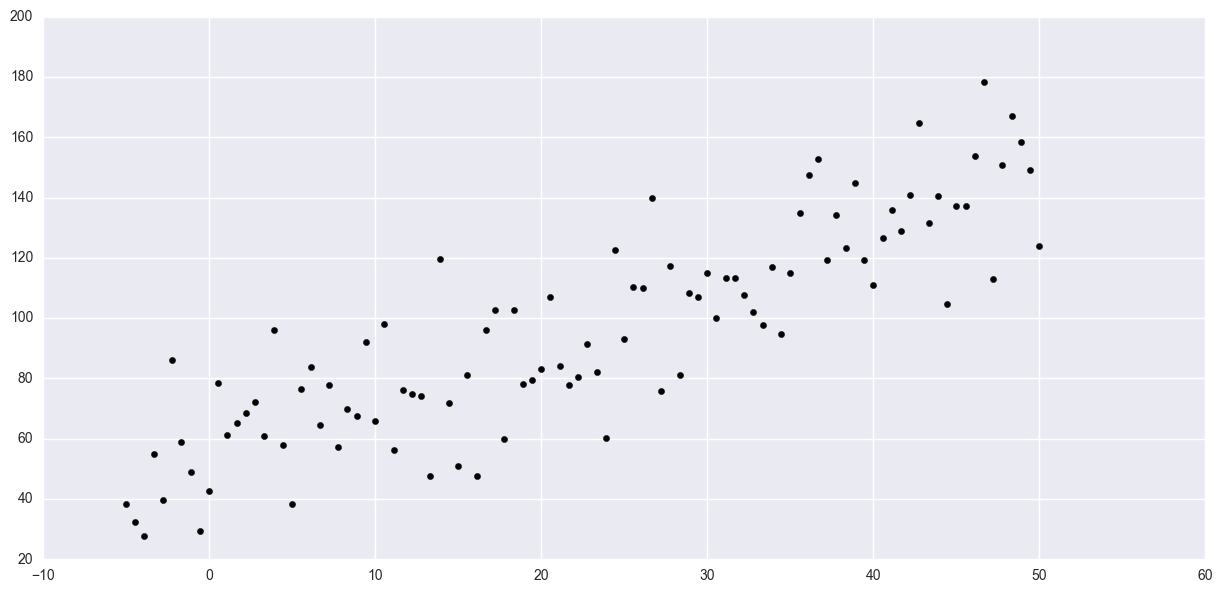

In [5]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')

## Naive/Baseline Prediction

What is the best prediction we can make for any data point if we can only use a single value?

How can we measure the success of our prediction?

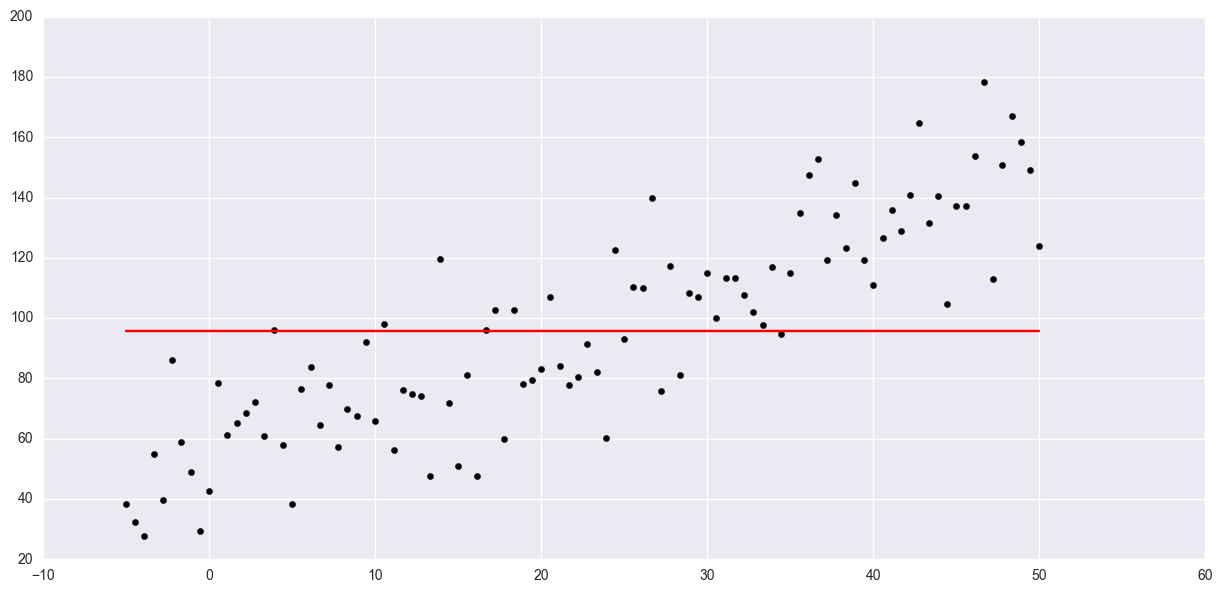

In [6]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(df['X'], df['Y'], c='k')
ax.plot((df['X'].min(), df['X'].max()),(np.mean(df['Y']), np.mean(df['Y'])), color='r');

## Let's add that to our DataFrame

In [7]:
df['Mean_Yhat'] = df['Y'].mean()
df

,X,Y,Mean_Yhat
0,-5.000000,38.237891,95.694145
1,-4.444444,32.408211,95.694145
2,-3.888889,27.678906,95.694145
3,-3.333333,54.883305,95.694145
4,-2.777778,39.740396,95.694145
5,-2.222222,86.167615,95.694145
6,-1.666667,58.831325,95.694145
7,-1.111111,49.002984,95.694145
8,-0.555556,29.508284,95.694145
9,0.000000,42.786868,95.694145


## How can we calculate our prediction error?

<img src="https://snag.gy/9R57Or.jpg">

## For each x value there is the actual y and our predicted y

<img src="http://i.imgur.com/Qs9MwV9.jpg" width=500>

<img src="http://i.imgur.com/JYi1PBp.jpg">

# Let's calculate the MSE (mean squared error)

In [8]:
df.head(3)

,X,Y,Mean_Yhat
0,-5.000000,38.237891,95.694145
1,-4.444444,32.408211,95.694145
2,-3.888889,27.678906,95.694145


In [9]:
df['Mean_Yhat_SE'] = np.square(df['Y'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

1215.606854308352

## We can confirm this by using scikit-learn's mean_squared_error()

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Y'], df['Mean_Yhat']) # takes in y and yhat
mse

1215.6068543083525

## How could we improve upon our original naive model?

Let y be a function of x

$y = mx + b$
<br>
or
<br>
$y = \beta_0 + \beta_1x_1$

So, we just need to find the parameters to plug in here that give us the smallest SSE.

## We saw how to do this in this morning's lecture

<img src="https://upload.wikimedia.org/math/e/e/d/eed68731d1230938d457c576deee1bcf.png">

## Exercise

Use the function we created in the earlier lecture, but this time have it return the MSE.
This time pass in the x and y values. Hint: use zip().

```python

def min_sse(my_list):
    
    xy_bar = pd.Series([x*y for x,y in my_list]).mean()
    x_bar = pd.Series([x[0] for x in my_list]).mean()
    y_bar = pd.Series([x[1] for x in my_list]).mean()
    x_sq_bar = pd.Series([x[0]**2 for x in my_list]).mean()
    x_bar_sq = x_bar**2
    
    m = (xy_bar - x_bar * y_bar)/(x_sq_bar - x_bar_sq)
    a = y_bar - m*x_bar
    
    return m, a
    
    
    
m, a = min_sse([[-1, 0], [1, 3], [2, 4], [3, 7], [4, 10]] )
```

In [11]:
def min_sse(my_list):

    xy_bar = pd.Series([x*y for x,y in my_list]).mean()
    x_bar = pd.Series([x[0] for x in my_list]).mean()
    y_bar = pd.Series([x[1] for x in my_list]).mean()
    x_sq_bar = pd.Series([x[0]**2 for x in my_list]).mean()
    x_bar_sq = x_bar**2

    m = (xy_bar - x_bar * y_bar)/(x_sq_bar - x_bar_sq)
    a = y_bar - m*x_bar
    
    y_hats = []
    y_true = []
    for x,y in my_list:
        y_hat = a + m*x
        y_hats.append(y_hat)
        y_true.append(y)
    
    mse = np.mean([np.square(yt-yh) for yt,yh in zip(y_true, y_hats)])
    
    return m, a, mse



m, a, mse = min_sse(zip(x,y))
print (m, a, mse)

(1.8843156446004647, 53.29704308464539, 302.46632345928066)


## Simple Linear Regression with Statsmodels

[Documentation](http://statsmodels.sourceforge.net/)

<img src="http://i.imgur.com/ap0fSjo.png" width=600>

## Let's run our model

In [12]:
import statsmodels.api as sm

# need to add an intercept in sm
X = sm.add_constant(x)

# # fit the model
model = sm.OLS(y, X)
results = model.fit()
# print(results.summary())

X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
#print(results.summary)
x

array([ -5.        ,  -4.44444444,  -3.88888889,  -3.33333333,
        -2.77777778,  -2.22222222,  -1.66666667,  -1.11111111,
        -0.55555556,   0.        ,   0.55555556,   1.11111111,
         1.66666667,   2.22222222,   2.77777778,   3.33333333,
         3.88888889,   4.44444444,   5.        ,   5.55555556,
         6.11111111,   6.66666667,   7.22222222,   7.77777778,
         8.33333333,   8.88888889,   9.44444444,  10.        ,
        10.55555556,  11.11111111,  11.66666667,  12.22222222,
        12.77777778,  13.33333333,  13.88888889,  14.44444444,
        15.        ,  15.55555556,  16.11111111,  16.66666667,
        17.22222222,  17.77777778,  18.33333333,  18.88888889,
        19.44444444,  20.        ,  20.55555556,  21.11111111,
        21.66666667,  22.22222222,  22.77777778,  23.33333333,
        23.88888889,  24.44444444,  25.        ,  25.55555556,
        26.11111111,  26.66666667,  27.22222222,  27.77777778,
        28.33333333,  28.88888889,  29.44444444,  30.  

## How to get the y_hat for each x

In [13]:
results.predict(X)

array([  43.87546486,   44.92230689,   45.96914891,   47.01599094,
         48.06283296,   49.10967499,   50.15651701,   51.20335904,
         52.25020106,   53.29704308,   54.34388511,   55.39072713,
         56.43756916,   57.48441118,   58.53125321,   59.57809523,
         60.62493726,   61.67177928,   62.71862131,   63.76546333,
         64.81230536,   65.85914738,   66.90598941,   67.95283143,
         68.99967346,   70.04651548,   71.09335751,   72.14019953,
         73.18704156,   74.23388358,   75.2807256 ,   76.32756763,
         77.37440965,   78.42125168,   79.4680937 ,   80.51493573,
         81.56177775,   82.60861978,   83.6554618 ,   84.70230383,
         85.74914585,   86.79598788,   87.8428299 ,   88.88967193,
         89.93651395,   90.98335598,   92.030198  ,   93.07704003,
         94.12388205,   95.17072408,   96.2175661 ,   97.26440813,
         98.31125015,   99.35809217,  100.4049342 ,  101.45177622,
        102.49861825,  103.54546027,  104.5923023 ,  105.63914

## Let's put that in our DataFrame

In [14]:
df['OLS_Yhat'] = results.predict(X)
df

,X,Y,Mean_Yhat,Mean_Yhat_SE,OLS_Yhat
0,-5.000000,38.237891,95.694145,3301.221130,43.875465
1,-4.444444,32.408211,95.694145,4005.109433,44.922307
2,-3.888889,27.678906,95.694145,4626.072758,45.969149
3,-3.333333,54.883305,95.694145,1665.524682,47.015991
4,-2.777778,39.740396,95.694145,3130.822046,48.062833
5,-2.222222,86.167615,95.694145,90.754768,49.109675
6,-1.666667,58.831325,95.694145,1358.867497,50.156517
7,-1.111111,49.002984,95.694145,2180.064500,51.203359
8,-0.555556,29.508284,95.694145,4380.568262,52.250201
9,0.000000,42.786868,95.694145,2799.179923,53.297043


## Again, let's calculate our MSE

In [15]:
df['OLS_Yhat_MSE'] = np.square(df['OLS_Yhat'] - df['Y'])
df['OLS_Yhat_MSE'].mean()

302.46632345928066

In [16]:
mse = mean_squared_error(df['Y'], df['OLS_Yhat'])
mse

302.46632345928072

## We can now plot our line

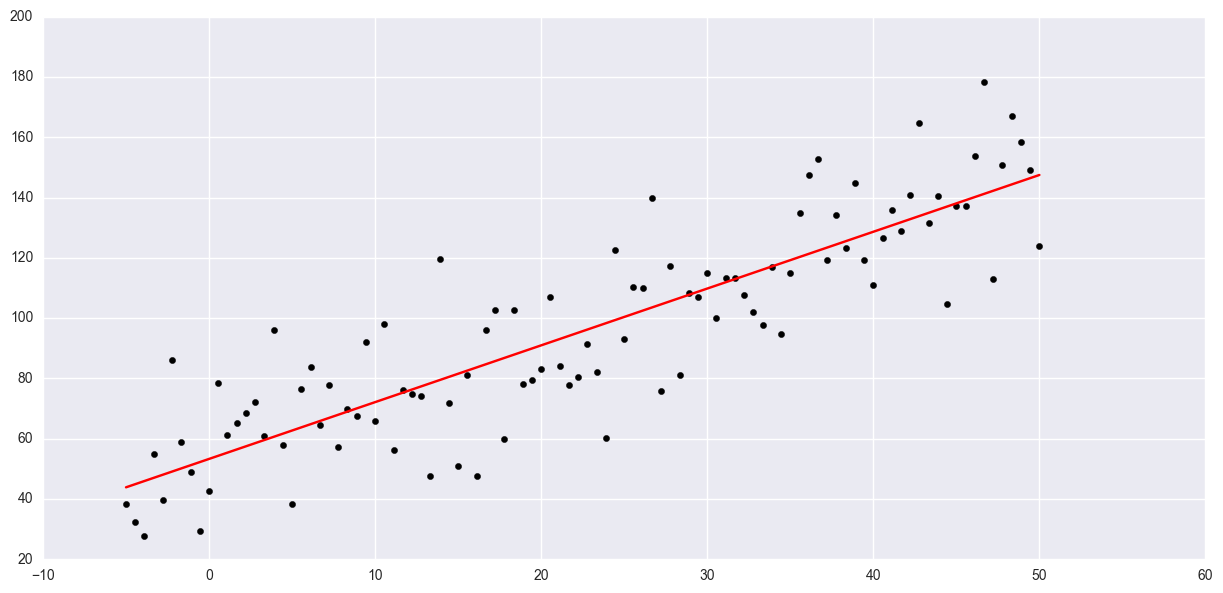

In [17]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(df['X'], df['OLS_Yhat'], color='r');


## We can also plot our residuals

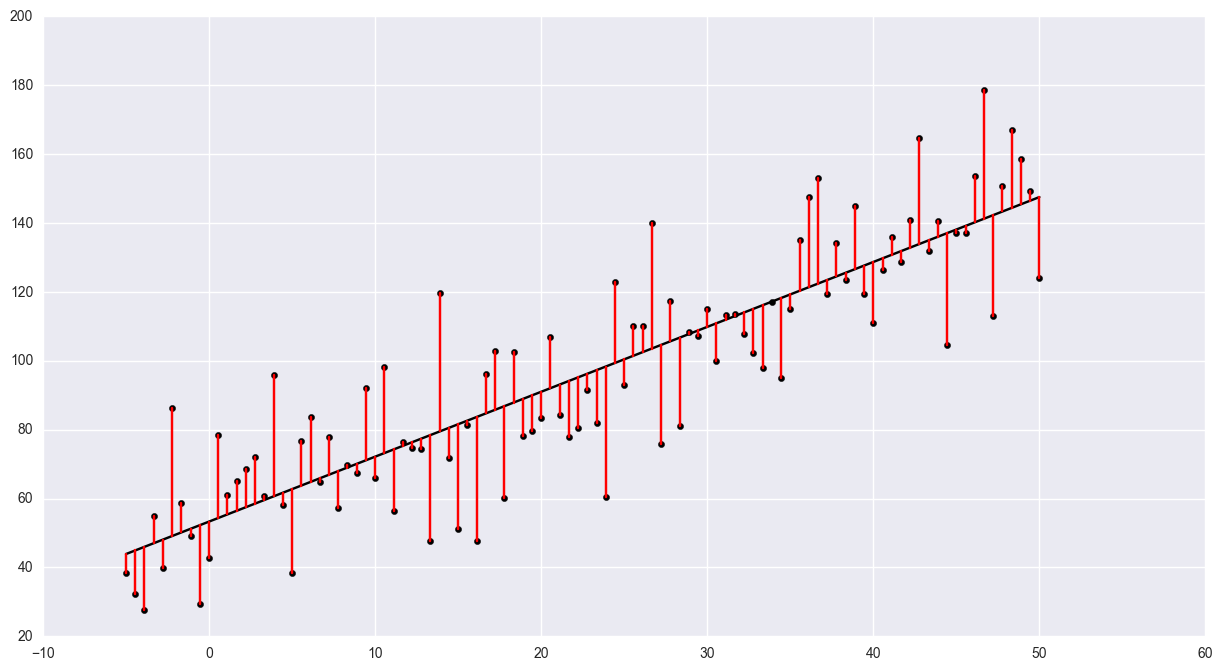

In [18]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=df['X'], y=df['Y'], c='k')
ax.plot(df['X'], df['OLS_Yhat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']), (row['Y'], row['OLS_Yhat']), 'r-')


## How can we get the MSE from the model we created

In [19]:
results.mse_resid

308.6391055706946

## How do we get the betas (model coefficients)?

In [20]:
results.params

array([ 53.29704308,   1.88431564])

### Simple linear equation formula
$ y = \beta_0 + \beta_1X_1$

<br>
### Plug in the values from our model
$ y = 46.53 + 2.08X_1$

## Plotting the residuals

In [21]:
results.resid

array([ -5.63757383e+00,  -1.25140957e+01,  -1.82902430e+01,
         7.86731390e+00,  -8.32243704e+00,   3.70579404e+01,
         8.67480810e+00,  -2.20037478e+00,  -2.27419175e+01,
        -1.05101746e+01,   2.41909946e+01,   5.75616343e+00,
         8.71419820e+00,   1.09774079e+01,   1.34935769e+01,
         1.27972148e+00,   3.53746255e+01,  -3.63439370e+00,
        -2.43154752e+01,   1.27994493e+01,   1.88864231e+01,
        -1.20764851e+00,   1.10474893e+01,  -1.06155917e+01,
         7.21795231e-01,  -2.66300528e+00,   2.10350150e+01,
        -6.32259923e+00,   2.49680150e+01,  -1.79700736e+01,
         1.01468686e+00,  -1.57811807e+00,  -3.14348100e+00,
        -3.08423435e+01,   4.01255597e+01,  -8.71292516e+00,
        -3.05357325e+01,  -1.38670542e+00,  -3.59609358e+01,
         1.13006633e+01,   1.69858182e+01,  -2.67491309e+01,
         1.48213932e+01,  -1.06974664e+01,  -1.03685606e+01,
        -7.74661677e+00,   1.48496186e+01,  -8.79894364e+00,
        -1.62257028e+01,

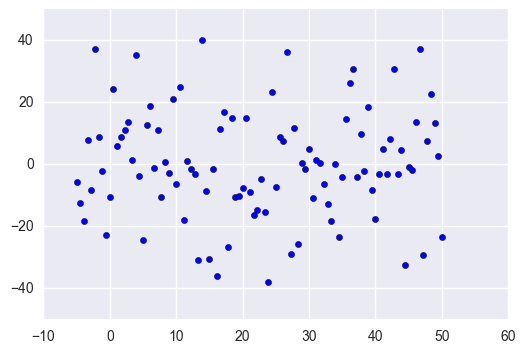

In [22]:
plt.scatter(x, results.resid)

## Exercise

Using stats models do/answer the following:
- Fit a model to the dataset (of cricket chirps per min by temperature) given below
- What is the equation of the line?
- What is the mse?
- Plot the data with the fitted line
- Plot the residuals - are they normal?

In [23]:
chirps = [(20, 88.59999847),
(16, 71.59999847),
(19.79999924, 93.30000305),
(18.39999962, 84.30000305),
(17.10000038, 80.59999847),
(15.5, 75.19999695),
(14.69999981, 69.69999695),
(17.10000038, 82),
(15.39999962, 69.40000153),
(16.20000076, 83.30000305),
(15, 79.59999847),
(17.20000076, 82.59999847),
(16, 80.59999847),
(17, 83.5),
(14.39999962, 76.30000305)]

In [24]:
cc=pd.DataFrame(chirps, columns=('x','y'))

In [25]:
import statsmodels.api as sm

# need to add an intercept in sm
X = sm.add_constant(cc['x'])

# fit the model
model = sm.OLS(cc['y'], X)
results = model.fit()
print(results.summary())
print(results.params)
print(results.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     29.97
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           0.000107
Time:                        13:50:00   Log-Likelihood:                -40.348
No. Observations:                  15   AIC:                             84.70
Df Residuals:                      13   BIC:                             86.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         25.2323     10.060      2.508      0.0

/Users/connorphoenix/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [26]:
#y = 4.79x + 0

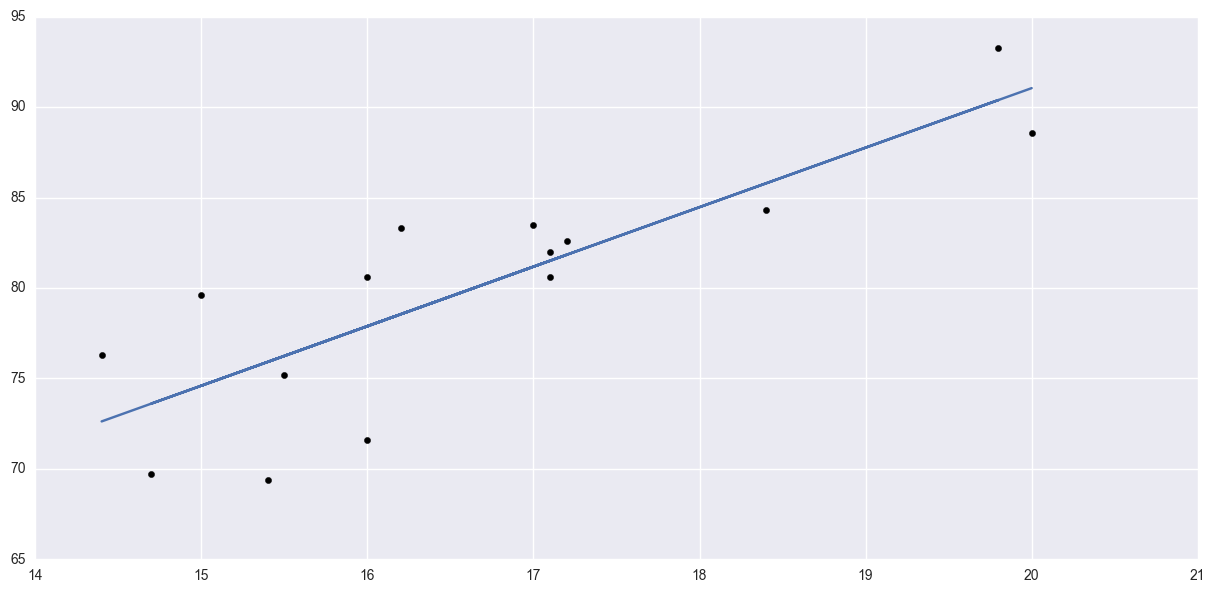

In [27]:
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(cc['x'], cc['y'], c='k')
ax.plot(cc['x'], results.predict(X))


## Assumptions of linear regression

- Linear and additive relationship between dependent and independent variables
- Statistical independence of errors
- Homoskedasticity of errors (constant variance)
- Normality of errors (with a mean 0)

## Let's see a model that violates some of our assumptions

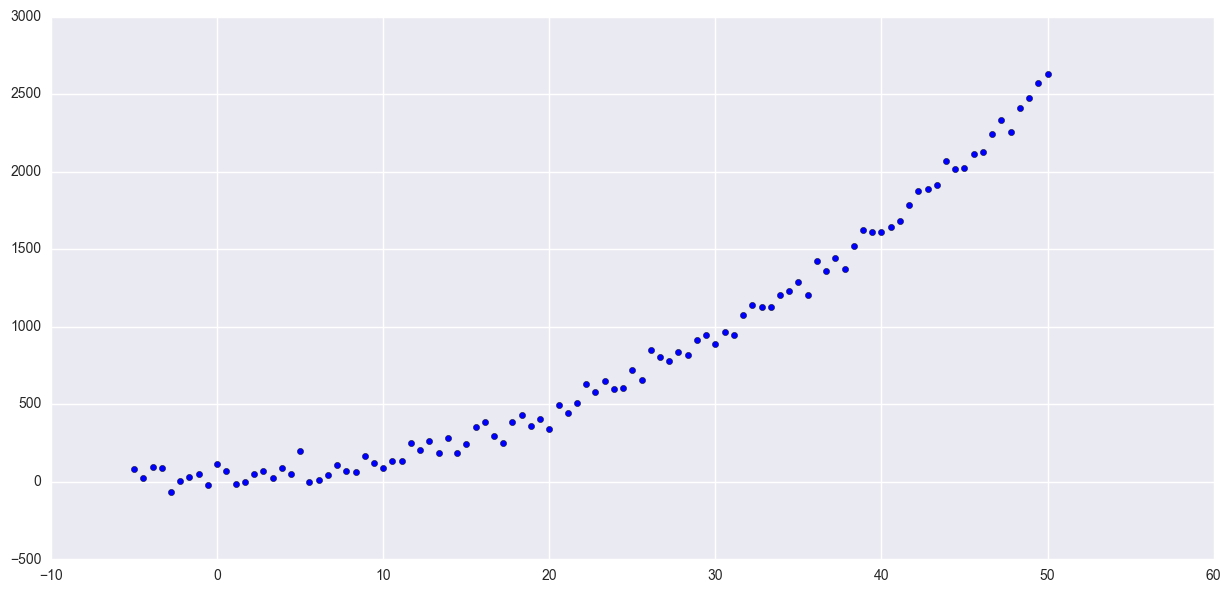

In [28]:
# create an x and a y that is 
# 50 plus 2 times x with some random noise around that
x = np.linspace(-5, 50, 100)
y = 50 + x ** 2 + np.random.normal(0, 50, size=len(x))

# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y)

## Let's fit a model to that

In [29]:
# need to add an intercept in sm
X = sm.add_constant(x)

# fit the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     934.3
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           6.62e-52
Time:                        13:50:01   Log-Likelihood:                -688.37
No. Observations:                 100   AIC:                             1381.
Df Residuals:                      98   BIC:                             1386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -215.0604     41.111     -5.231      0.0

## Let's plot our line

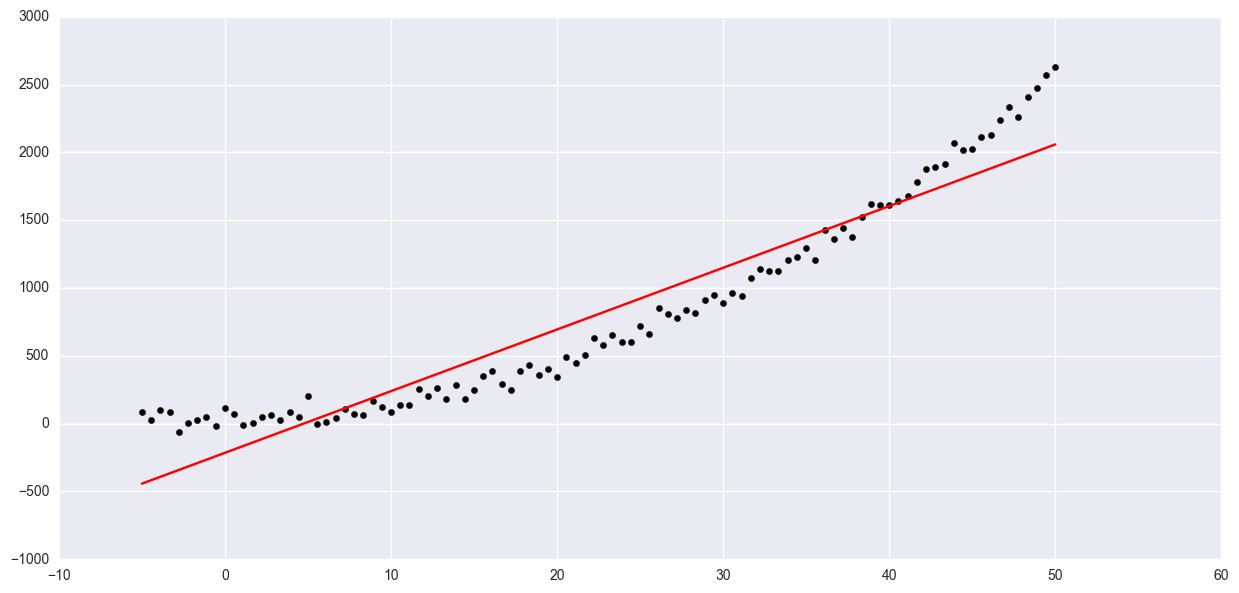

In [30]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(x, results.predict(X), color='r');


## What might the residuals on that look like?

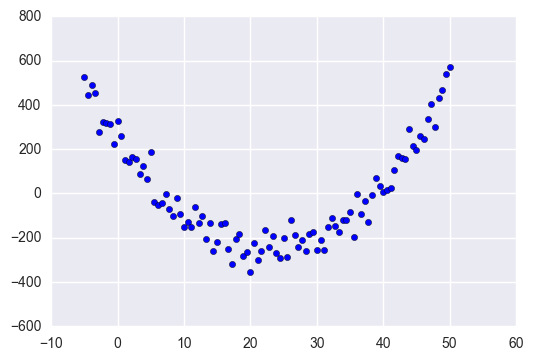

In [31]:
plt.scatter(x, results.resid)

## If I make a prediction using this model what will happen?

- Under what circumstances will the prediction be way off?

## Other issues in regression

- Multicollineary: When two or more independent variables are highly correlated
    - Does not affect predictive accuracy, but can cause model to be interpreted improperly (Check VIF)
    - [Read More](http://blog.minitab.com/blog/adventures-in-statistics-2/what-are-the-effects-of-multicollinearity-and-when-can-i-ignore-them)
- Heterskedasticity : The variance is not constant
    - [Read More](https://en.wikipedia.org/wiki/Heteroscedasticity)
    <img src="https://static1.squarespace.com/static/4f5694c424aca8d4f8e69194/t/51e9f5d6e4b07ef008368d84/1374287319317/Rplot.income.cone.jpg" width=300>
    
[Consequence of LR Assumptions](http://people.duke.edu/~rnau/testing.htm#independence)

## Transformations

In [32]:
mammals = pd.read_csv('./msleep.txt')

In [33]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [34]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
name            83 non-null object
genus           83 non-null object
vore            76 non-null object
order           83 non-null object
conservation    54 non-null object
sleep_total     83 non-null float64
sleep_rem       61 non-null float64
sleep_cycle     32 non-null float64
awake           83 non-null float64
brainwt         56 non-null float64
bodywt          83 non-null float64
dtypes: float64(6), object(5)
memory usage: 7.2+ KB


In [35]:
mammals.dropna(subset=['name', 'brainwt', 'bodywt'], inplace=True)

In [36]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 82
Data columns (total 11 columns):
name            56 non-null object
genus           56 non-null object
vore            51 non-null object
order           56 non-null object
conservation    36 non-null object
sleep_total     56 non-null float64
sleep_rem       48 non-null float64
sleep_cycle     30 non-null float64
awake           56 non-null float64
brainwt         56 non-null float64
bodywt          56 non-null float64
dtypes: float64(6), object(5)
memory usage: 5.2+ KB


In [37]:
mammals = mammals[['name', 'bodywt', 'brainwt']].copy()

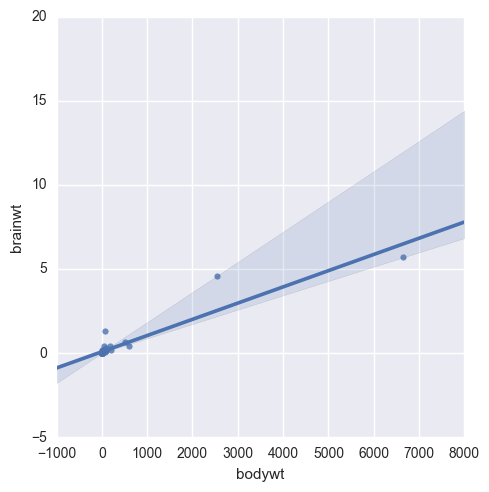

In [38]:
import seaborn as sns
sns.lmplot('bodywt', 'brainwt', mammals)

In [39]:
# need to add an intercept in sm
MX = sm.add_constant(mammals['bodywt'])
MY = mammals['brainwt']

# fit the model
mammal_model = sm.OLS(MY, MX)
mammal_results = mammal_model.fit()
print(mammal_results.summary())

                            OLS Regression Results                            
Dep. Variable:                brainwt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           9.16e-26
Time:                        13:50:03   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0859      0.048      1.782      0.0

## Let's plot our residuals

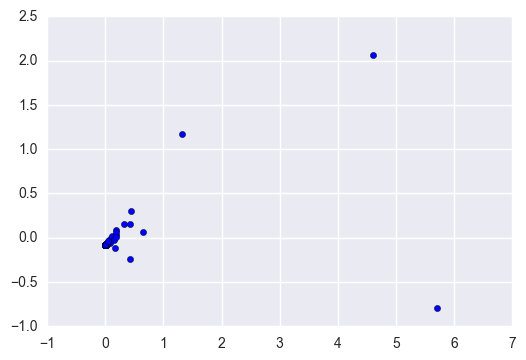

In [40]:
plt.scatter(mammals['brainwt'], mammal_results.resid)

## And let's take a look at our MSE

In [41]:
mammal_results.mse_resid

0.12434232239989515

## Let's try transforming our data by using log/log

In [42]:
mammals.loc[:, 'log_bodywt'] = np.log10(mammals['bodywt'])
mammals.loc[:, 'log_brainwt'] = np.log10(mammals['brainwt'])
mammals.head()

,name,bodywt,brainwt,log_bodywt,log_brainwt
1,Owl monkey,0.480,0.01550,-0.318759,-1.809668
3,Greater short-tailed shrew,0.019,0.00029,-1.721246,-3.537602
4,Cow,600.000,0.42300,2.778151,-0.373660
8,Dog,14.000,0.07000,1.146128,-1.154902
9,Roe deer,14.800,0.09820,1.170262,-1.007889


## We can now plot these

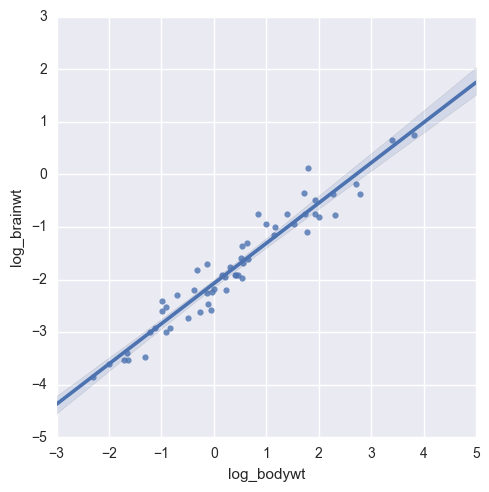

In [43]:
sns.lmplot('log_bodywt', 'log_brainwt', mammals)

## And refit our model

In [44]:
# need to add an intercept in sm
MX = sm.add_constant(mammals['log_bodywt'])
MY = mammals['log_brainwt']

# fit the model
mammal_model = sm.OLS(MY, MX)
mammal_results = mammal_model.fit()
print(mammal_results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_brainwt   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     738.4
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           3.56e-33
Time:                        13:50:04   Log-Likelihood:                -8.9817
No. Observations:                  56   AIC:                             21.96
Df Residuals:                      54   BIC:                             26.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.0739      0.040    -51.463      0.0

## Again, let's see our MSE

In [45]:
mammal_results.mse_resid

0.083681768842796489

## And plotting our residuals

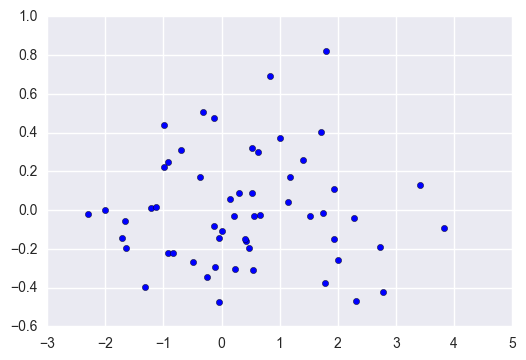

In [46]:
plt.scatter(mammals['log_bodywt'], mammal_results.resid)

## Regression with Scikit-Learn

[Documentation](http://scikit-learn.org/stable/index.html)

<img src="http://i.imgur.com/xMmmuxm.png" width=500>

## LR documentation

<img src="http://i.imgur.com/CNojpUU.png" width=500>

## Fitting a linear regression in sk-learn

In [47]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
df['Z'] = [x for x in range(100)]
#sklearn can be picky about the shape of your data
X = df[['X']].values.reshape(-1, 1)
y = df['Y']
X
clf.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Getting our y_hats

In [48]:
# get our predictions
clf.predict(X)

array([  43.87546486,   44.92230689,   45.96914891,   47.01599094,
         48.06283296,   49.10967499,   50.15651701,   51.20335904,
         52.25020106,   53.29704308,   54.34388511,   55.39072713,
         56.43756916,   57.48441118,   58.53125321,   59.57809523,
         60.62493726,   61.67177928,   62.71862131,   63.76546333,
         64.81230536,   65.85914738,   66.90598941,   67.95283143,
         68.99967346,   70.04651548,   71.09335751,   72.14019953,
         73.18704156,   74.23388358,   75.2807256 ,   76.32756763,
         77.37440965,   78.42125168,   79.4680937 ,   80.51493573,
         81.56177775,   82.60861978,   83.6554618 ,   84.70230383,
         85.74914585,   86.79598788,   87.8428299 ,   88.88967193,
         89.93651395,   90.98335598,   92.030198  ,   93.07704003,
         94.12388205,   95.17072408,   96.2175661 ,   97.26440813,
         98.31125015,   99.35809217,  100.4049342 ,  101.45177622,
        102.49861825,  103.54546027,  104.5923023 ,  105.63914

## Getting our intercept, betas, and MSE

In [49]:
# get our intercept
clf.intercept_

53.297043084645559

In [50]:
# get our coefficients
clf.coef_

array([ 1.88431564])

In [51]:
# get our mse
mean_squared_error(y, clf.predict(X))

302.46632345928066

## Exercise

Using the cricket data set, rerun the model using sklearn and answer the same questions as in the previous exercise

In [52]:
chirps = [(20, 88.59999847),
(16, 71.59999847),
(19.79999924, 93.30000305),
(18.39999962, 84.30000305),
(17.10000038, 80.59999847),
(15.5, 75.19999695),
(14.69999981, 69.69999695),
(17.10000038, 82),
(15.39999962, 69.40000153),
(16.20000076, 83.30000305),
(15, 79.59999847),
(17.20000076, 82.59999847),
(16, 80.59999847),
(17, 83.5),
(14.39999962, 76.30000305)]

[ 3.29109457]
25.2323049834
12.7031592949


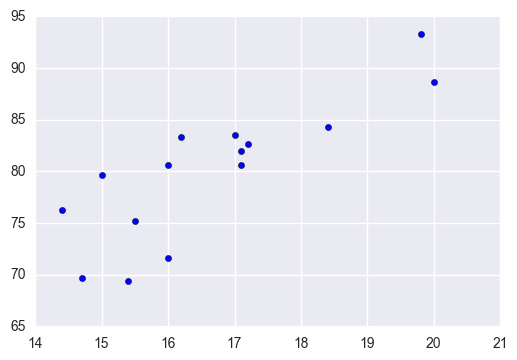

In [53]:
chirpdf=pd.DataFrame(chirps, columns=['X','Y'])
X = chirpdf['X'].reshape(-1,1)
clf = LinearRegression()
clf.fit(X, chirpdf['Y'])
chirpdf['yhat'] = clf.predict(X)
print(clf.coef_)
print(clf.intercept_)
print(mean_squared_error(clf.predict(X), chirpdf['Y']))
plt.scatter(chirpdf['X'],chirpdf['Y'])

Using stats models do/answer the following:
Fit a model to the dataset (of cricket chirps per min by temperature) given below
What is the equation of the line?
What is the mse?
Plot the data with the fitted line
Plot the residuals - are they normal?

In [54]:
# y = 3.29x + 25.2

NameError: name 'Y' is not defined

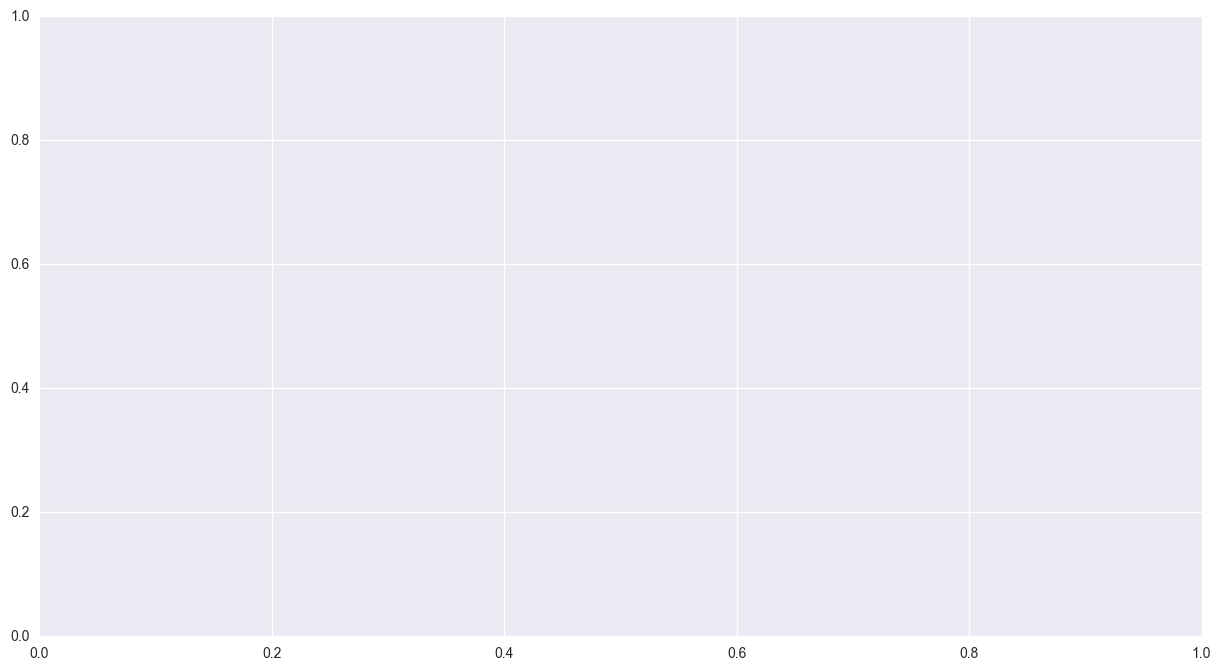

In [55]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='k')
ax.plot(Y, clf.predict(X), color='k');

## Conclusion

In this lecture, we have discussed the following:
- The linear regression model
- How to fit a linear regression in both statsmodels and sklearn
- The assumptions of ols and the consequences of violating those assumptions
- How transformations can be beneficial to modeling